# Phase 2 Project



Folder Contents:

In [1]:
%ls

CONTRIBUTING.md        dj-Copy1.ipynb         jake.ipynb
LICENSE.md             dj.ipynb               rachaelnotebook.ipynb
README.md              dj2.ipynb              student.ipynb
data/                  halfway-there.gif


## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


plt.style.use('seaborn-notebook')

## Initial Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
#Find null values
(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
id               0.000000
grade            0.000000
lat              0.000000
address          0.000000
yr_renovated     0.000000
yr_built         0.000000
sqft_patio       0.000000
sqft_garage      0.000000
sqft_basement    0.000000
sqft_above       0.000000
condition        0.000000
date             0.000000
view             0.000000
nuisance         0.000000
greenbelt        0.000000
waterfront       0.000000
floors           0.000000
sqft_lot         0.000000
sqft_living      0.000000
bathrooms        0.000000
bedrooms         0.000000
price            0.000000
long             0.000000
dtype: float64

In [6]:
df['grade'].value_counts().sort_index()

1 Cabin              2
10 Very Good      1371
11 Excellent       406
12 Luxury          122
13 Mansion          24
2 Substandard        2
3 Poor              13
4 Low               51
5 Fair             393
6 Low Average     2858
7 Average        11697
8 Good            9410
9 Better          3806
Name: grade, dtype: int64

In [7]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

Get zipcode into its own column by splitting it from address column.
Followed by a loop that only keeps the the zipcodes that have a frequency of at least 100 homes in them.

In [8]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

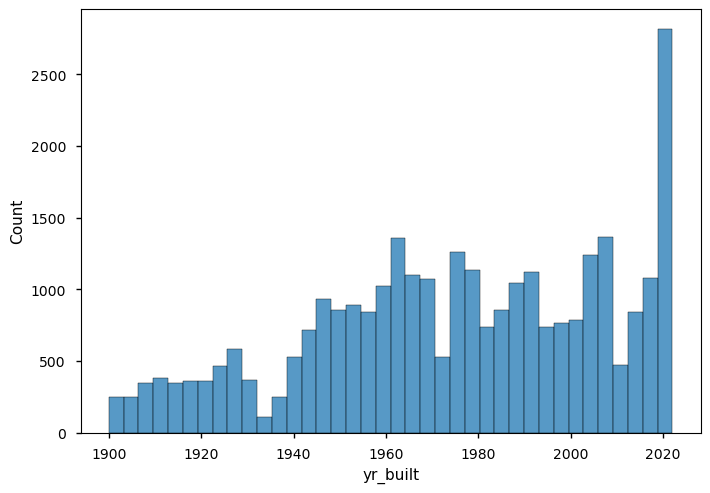

In [9]:
sns.histplot(df['yr_built'])

In [10]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Creating columns for Price per square foot for living space, and lot space.

## Data Cleaning and Engineering

Price per square foot columns for Lot and Living.

In [11]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

In [12]:
df['ppsq_living'].mean()

561.5095244569712

In [13]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

In [14]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips

seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98154, 98164, 98174, 98195, 98199]
df = df[df['zipcode'].isin(seattle) == True]

#goodzips = []
#for key, value in df['zipcode'].value_counts().items():
#    if value > 100:
#        goodzips.append(key)
#    else:
#        continue
#len(goodzips)
#df = df[df['zipcode'].isin(goodzips) == True]

In [15]:
df['zipcode'].value_counts(ascending=False).head(20)

98115    761
98103    761
98117    748
98133    664
98118    601
98106    544
98125    489
98107    458
98126    441
98122    440
98144    439
98199    410
98116    388
98105    330
98112    307
98108    305
98136    299
98119    241
98102    144
98109    129
Name: zipcode, dtype: int64

In [16]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

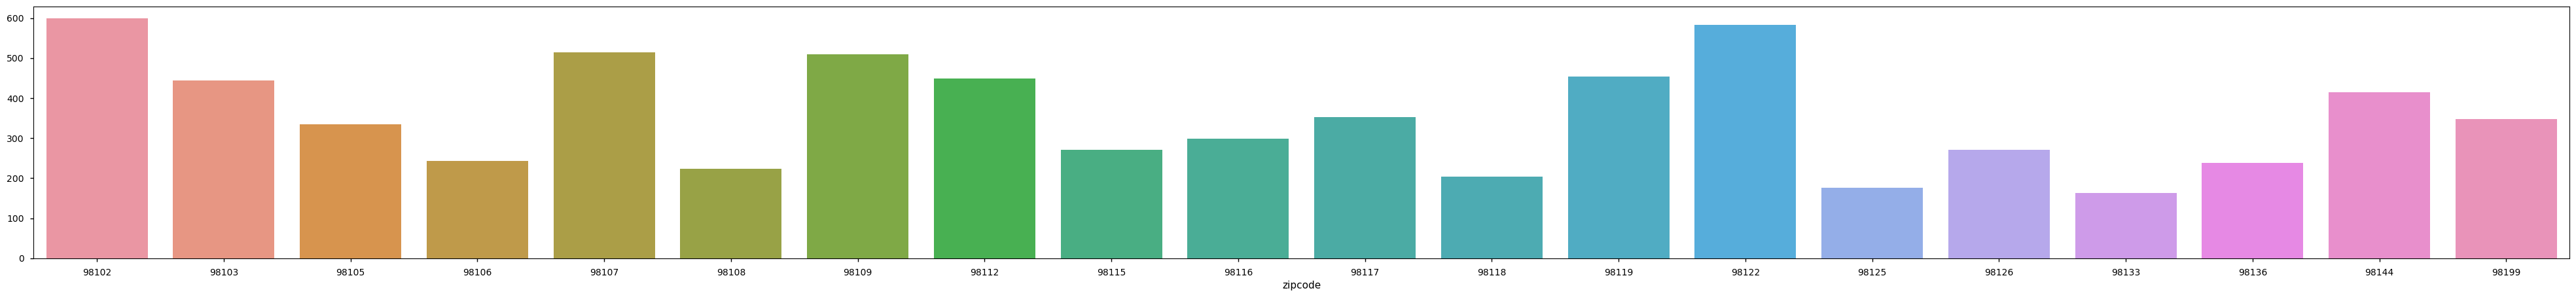

In [17]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

<AxesSubplot:>

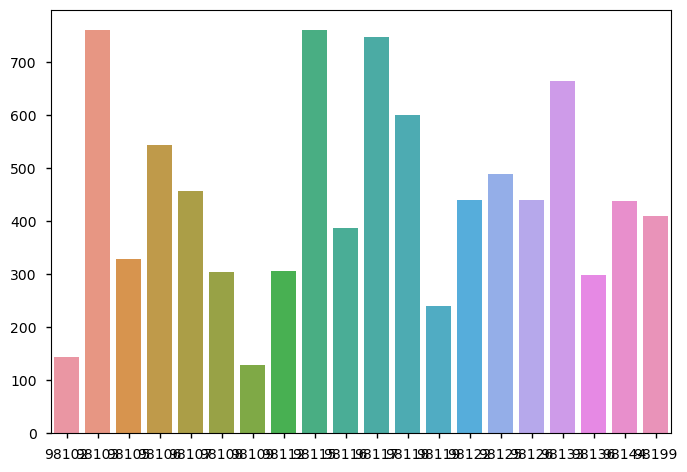

In [18]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

Drop tiny homes from the dataset. In Washington, the tiny home sqaure footage is 400sq ft. 

In [19]:
df = df[df['sqft_living'] > 400]

Turn Columns into numeric values. 
Binary values become 1 if present, 0 if not present

In [20]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

In [21]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.006976
greenbelt     0.000450
nuisance      0.257876
dtype: float64

Create new columns for Basement, Patio, and Garage presence. 1 if present (sqaure feet over 0), 0 if not.

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

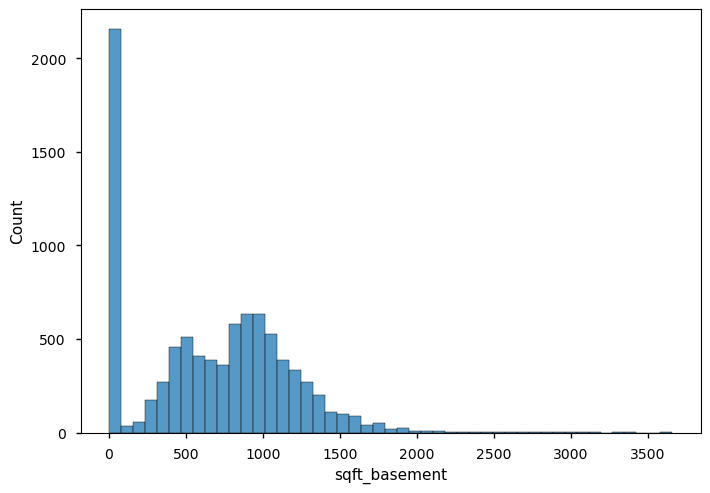

In [22]:
sns.histplot(df['sqft_basement'])

In [23]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      1
sewer_system     4
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
ppsq_living      0
ppsq_lot         0
zipcode          0
dtype: int64

In [24]:
df.reset_index(inplace=True)

In [25]:
basement_no_basement = []
for item in df['sqft_basement']:
    if item > 0:
        basement_no_basement.append(1)
    else:
        basement_no_basement.append(0)
df['basement'] = pd.DataFrame(basement_no_basement)

In [26]:
patio_no_patio = []
for item in df['sqft_patio']:
    if item > 0:
        patio_no_patio.append(1)
    else:
        patio_no_patio.append(0)
df['patio'] = pd.DataFrame(patio_no_patio)

In [27]:
garage_no_garage = []
for item in df['sqft_garage']:
    if item > 0:
        garage_no_garage.append(1)
    else:
        garage_no_garage.append(0)
df['garage'] = pd.DataFrame(garage_no_garage)

Drop Address, Latitude, Longitude, and Condition

In [28]:
df.drop(['address', 'lat', 'long', 'condition'], axis=1, inplace=True)

Finding the IQR for Price, ruling out outliers by multiplying IQR by 1.5

In [29]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25)
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2047750.0 and below -70250.0 is an outlier


In [30]:
df = df[df['price'] < upper_lim_price] #filtering out the outliers based on the above cell

/Users/RachaelMcCue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

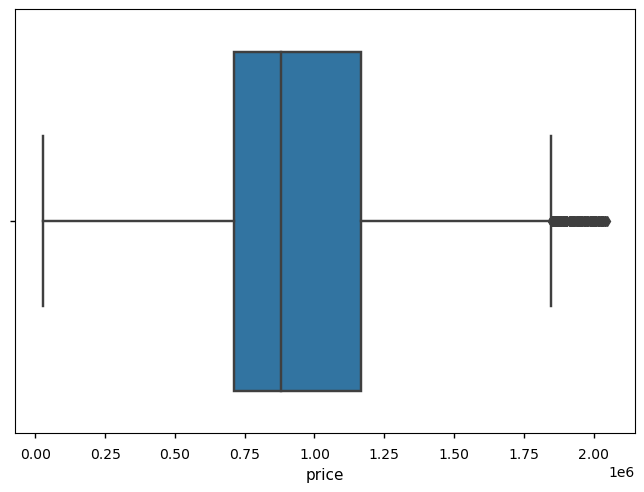

In [31]:
sns.boxplot(df['price'])

In [32]:
df['price'].describe()

count    8.318000e+03
mean     9.601726e+05
std      3.599887e+05
min      2.756300e+04
25%      7.100000e+05
50%      8.800000e+05
75%      1.165069e+06
max      2.047000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

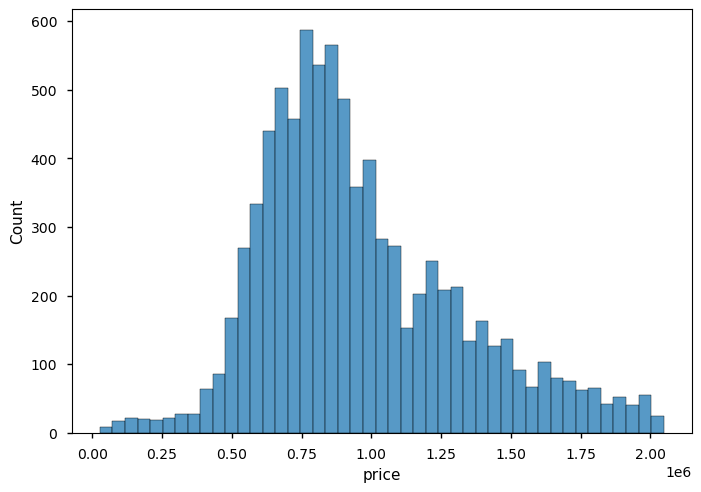

In [33]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

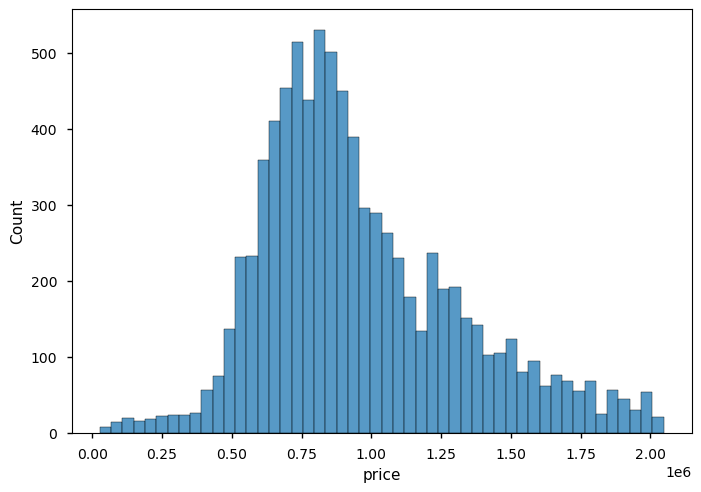

In [34]:
sns.histplot(df['price'], bins=50)

Finding the IQR for Bedrooms, ruling out outliers by multiplying IQR by 1.5

In [35]:
iqrsqft_lot = np.percentile(df['sqft_lot'], 75) -np.percentile(df['sqft_lot'], 25) ##calculating the upper and lower limits for outliers using iqr1.5
lower_lim_sqft_lot =np.percentile(df['sqft_lot'], 25) - 1.5*iqrsqft_lot
upper_lim_sqft_lot =np.percentile(df['sqft_lot'], 75) + 1.5*iqrsqft_lot
print(f'anything above {upper_lim_sqft_lot} and below {lower_lim_sqft_lot} is an outlier')

anything above 11634.25 and below -2963.75 is an outlier


In [36]:
df = df[df['sqft_lot'] <= upper_lim_sqft_lot]

In [37]:
df = df[df['yr_built'] >= 2013]

In [38]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)

Rewrote Heat source column -- items that contained Solar are now just Solar (previously Solar/Electricity or Solar/Gas). Ran a test model on the categorical variables and none were significant. 

In [39]:
##Getting solar homes into their own category. Now all heat sources are singular values.
source = []
df.reset_index(inplace=True)
for heat in df['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df['heat_source'] = source_df

In [40]:
df.drop(['level_0', 'index'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_basement,sqft_garage,sqft_patio,yr_built,ppsq_living,ppsq_lot,zipcode,basement,patio,garage
0,739950.0,2,2.0,1000,1414,3.0,0,0,0,NONE,...,0,0,220,2021,739.95,523.30,98103,0,1,0
1,730000.0,3,2.0,1570,1184,3.0,0,0,0,NONE,...,340,250,30,2021,464.97,616.55,98133,1,1,1
2,687388.0,3,3.5,1720,1674,2.0,0,0,0,NONE,...,700,390,120,2021,399.64,410.63,98106,1,1,1
3,830000.0,3,2.0,1350,667,3.0,0,0,1,NONE,...,380,0,520,2019,614.81,1244.38,98117,1,1,0
4,945000.0,4,2.5,1850,3076,2.5,0,0,0,NONE,...,0,0,0,2013,510.81,307.22,98108,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1298000.0,3,2.5,2230,4249,2.0,0,0,0,NONE,...,0,440,0,2015,582.06,305.48,98133,0,0,1
1339,820000.0,3,2.0,1600,1489,2.0,0,0,1,NONE,...,500,0,550,2016,512.50,550.71,98122,1,1,0
1340,985000.0,3,2.0,1450,888,3.0,0,0,0,NONE,...,0,0,410,2021,679.31,1109.23,98107,0,1,0
1341,345629.0,3,3.5,1430,1078,2.0,0,0,1,NONE,...,330,0,230,2018,241.70,320.62,98107,1,1,0


In [41]:
dummy_heat = pd.get_dummies(df['heat_source'])

In [42]:
df_w_heat = pd.concat([df, dummy_heat], axis=1)

In [43]:
df_w_heat.drop(['level_0', 'index'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,yr_built,ppsq_living,ppsq_lot,zipcode,basement,patio,garage,Electricity,Gas,Solar
0,739950.0,2,2.0,1000,1414,3.0,0,0,0,NONE,...,2021,739.95,523.30,98103,0,1,0,1,0,0
1,730000.0,3,2.0,1570,1184,3.0,0,0,0,NONE,...,2021,464.97,616.55,98133,1,1,1,1,0,0
2,687388.0,3,3.5,1720,1674,2.0,0,0,0,NONE,...,2021,399.64,410.63,98106,1,1,1,1,0,0
3,830000.0,3,2.0,1350,667,3.0,0,0,1,NONE,...,2019,614.81,1244.38,98117,1,1,0,1,0,0
4,945000.0,4,2.5,1850,3076,2.5,0,0,0,NONE,...,2013,510.81,307.22,98108,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1298000.0,3,2.5,2230,4249,2.0,0,0,0,NONE,...,2015,582.06,305.48,98133,0,0,1,1,0,0
1339,820000.0,3,2.0,1600,1489,2.0,0,0,1,NONE,...,2016,512.50,550.71,98122,1,1,0,0,1,0
1340,985000.0,3,2.0,1450,888,3.0,0,0,0,NONE,...,2021,679.31,1109.23,98107,0,1,0,1,0,0
1341,345629.0,3,3.5,1430,1078,2.0,0,0,1,NONE,...,2018,241.70,320.62,98107,1,1,0,1,0,0


In [64]:
df['waterfront'].value_counts()

0    1343
Name: waterfront, dtype: int64

## Initial Analysis for building models

In [44]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701065
sqft_above       0.643214
sqft_lot         0.550773
bedrooms         0.480358
bathrooms        0.454792
sqft_garage      0.397782
ppsq_living      0.353322
sqft_basement    0.332483
garage           0.297122
sqft_patio       0.250757
basement         0.125027
patio            0.042367
greenbelt        0.002201
index           -0.043935
level_0         -0.043940
zipcode         -0.047166
nuisance        -0.092015
ppsq_lot        -0.139750
floors          -0.191550
yr_built        -0.253000
waterfront            NaN
Name: price, dtype: float64

<AxesSubplot:>

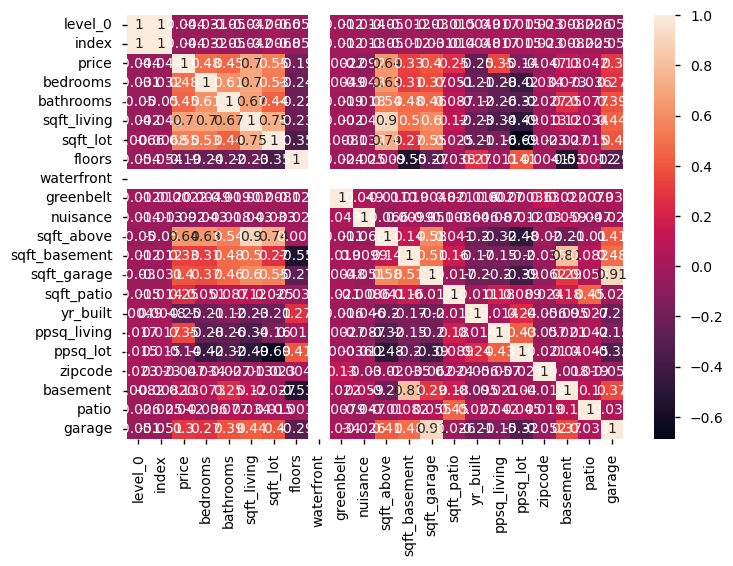

In [45]:
sns.heatmap(df.corr(), annot=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   level_0        1343 non-null   int64  
 1   index          1343 non-null   int64  
 2   price          1343 non-null   float64
 3   bedrooms       1343 non-null   int64  
 4   bathrooms      1343 non-null   float64
 5   sqft_living    1343 non-null   int64  
 6   sqft_lot       1343 non-null   int64  
 7   floors         1343 non-null   float64
 8   waterfront     1343 non-null   int64  
 9   greenbelt      1343 non-null   int64  
 10  nuisance       1343 non-null   int64  
 11  view           1343 non-null   object 
 12  grade          1343 non-null   object 
 13  heat_source    1342 non-null   object 
 14  sewer_system   1339 non-null   object 
 15  sqft_above     1343 non-null   int64  
 16  sqft_basement  1343 non-null   int64  
 17  sqft_garage    1343 non-null   int64  
 18  sqft_pat

## Dummy Regressor

The baseline model is comparing the mean sale price to the actual sale price.

In [47]:
df['avg_price'] = df['price'].mean()
X = df['avg_price']
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()
dummy_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                nan
Time:                        12:51:03   Log-Likelihood:                -18926.
No. Observations:                1343   AIC:                         3.785e+04
Df Residuals:                    1342   BIC:                         3.786e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.010    103.802      0.000       0.981       1.019
==============================================================================
Omnibus:                      274.356   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.771
Skew:                           1.273   Prob(JB):                    5.41e-106
Kurtosis:                       4.476   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression Model

Our simple linear regression models sqft_above with price. "Square feet above" was chosen because "square feet living" is not informative to the stakeholder. 

In [48]:
x = df['sqft_above']
y = df['price']
simple_reg = sm.OLS(y, sm.add_constant(x)).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     946.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.10e-157
Time:                        12:51:03   Log-Likelihood:                -18567.
No. Observations:                1343   AIC:                         3.714e+04
Df Residuals:                    1341   BIC:                         3.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.707e+05   1.86e+04     19.944      0.000    3.34e+05    4.07e+05
sqft_above   384.4946     12.499     30.762      0.000     359.975     409.014
==============================================================================
Omnibus:                       93.324   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.847
Skew:                           0.406   Prob(JB):                     1.11e-48
Kurtosis:                       4.813   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

For every square foot added, price increases by $428.96.
The variable is significant as its below the P value, given the threshold of the significance level is 95%.
The Square feet above ground explains about 45% of the variability in price.

## First Multiple Linear Regression Model

Standard scale all X variables. This does not include categorical variables, such as "heat source" and "grade".

In [49]:
scaled = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1))
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1).columns

In [50]:

x = scaled_df.drop(['price', 'zipcode', 'ppsq_living', 'ppsq_lot', 'avg_price'], axis=1)
y = scaled_df['price']

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.51e-219
Time:                        12:51:03   Log-Likelihood:                -1362.9
No. Observations:                1343   AIC:                             2760.
Df Residuals:                    1326   BIC:                             2848.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.204e-18      0.018   2.84e-16      1.000      -0.036       0.036
level_0          -0.0139      0.018     -0.752      0.452      -0.050       0.022
bedrooms         -0.0464      0.028     -1.671      0.095      -0.101       0.008
bathrooms         0.0090      0.027      0.331      0.741      -0.044       0.062
sqft_living       0.4006      0.124      3.225      0.001       0.157       0.644
sqft_lot          0.0853      0.034      2.531      0.011       0.019       0.151
floors           -0.0178      0.028     -0.644      0.520      -0.072       0.036
waterfront    -3.407e-17   6.46e-17     -0.527      0.598   -1.61e-16    9.26e-17
greenbelt         0.0031      0.018      0.168      0.866      -0.033       0.039
nuisance         -0.0762      0.019     -4.108      0.000      -0.113      -0.040
sqft_above        0.3286      0.118      2.789      0.005       0.097       0.560
sqft_basement    -0.1028      0.062     -1.648      0.100      -0.225       0.020
sqft_garage      -0.1067      0.060     -1.780      0.075      -0.224       0.011
sqft_patio        0.1908      0.021      8.914      0.000       0.149       0.233
yr_built         -0.0969      0.020     -4.918      0.000      -0.136      -0.058
basement          0.2186      0.040      5.487      0.000       0.140       0.297
patio            -0.0665      0.021     -3.164      0.002      -0.108      -0.025
garage            0.0069      0.050      0.137      0.891      -0.091       0.105
==============================================================================
Omnibus:                      195.324   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1880.672
Skew:                          -0.327   Prob(JB):                         0.00
Kurtosis:                       8.760   Cond. No.                     3.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation

Variables that are statistically significant (where P value is less than .05):
- Bathrooms
- Greenbelt
- Nuisance
- Square feet above ground
- Square feet basement
- Square feet garage
- Square feet patio
- Year built
- Presence of basement
- Presence of patio
- Presence of garage

However, some variables were found to be not significant, we will chose to include them as they are important to the stakeholder. 

In [51]:
print("The mean squared error of price is ", model.mse_total, " standard deviations.")

The mean squared error of price is  1.0007451564828613  standard deviations.


In [52]:
df['price'].std()

319251.18583176925

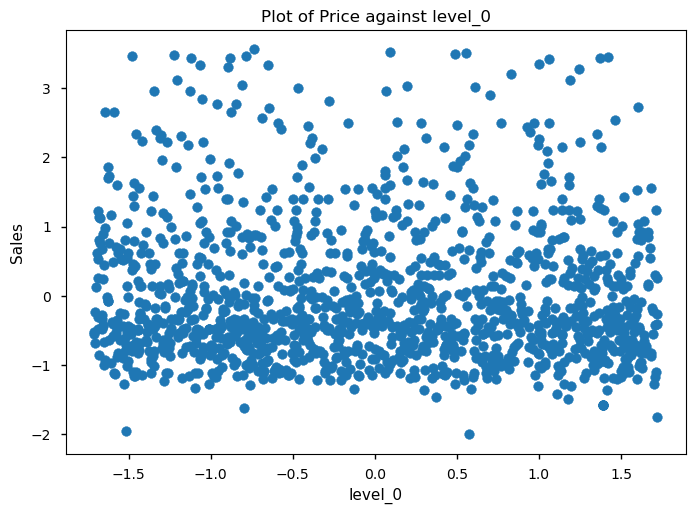

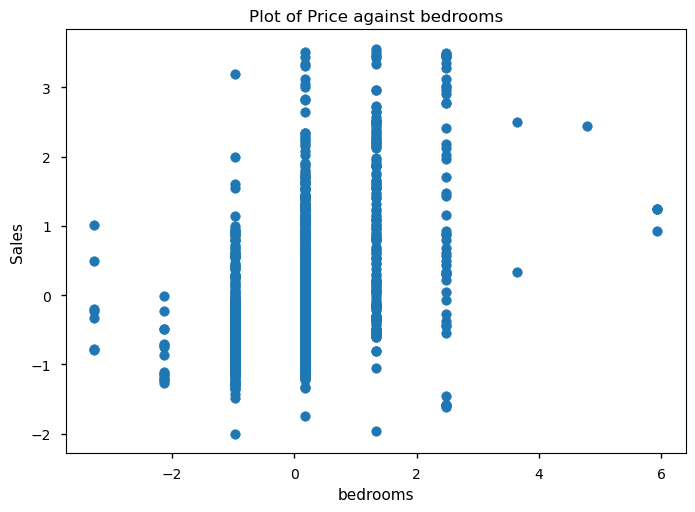

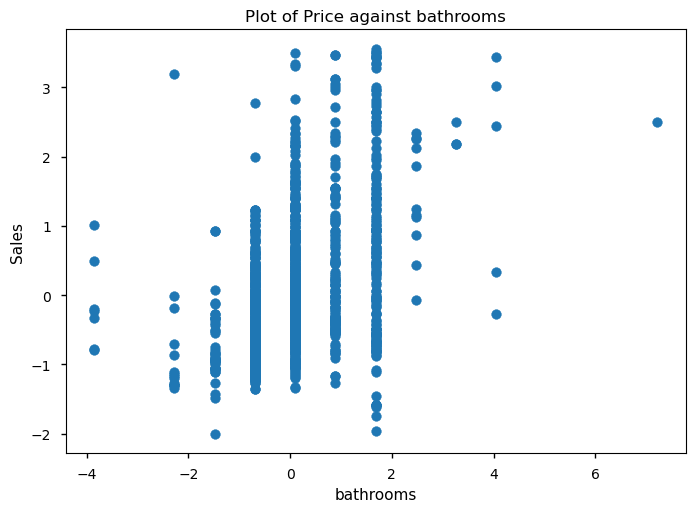

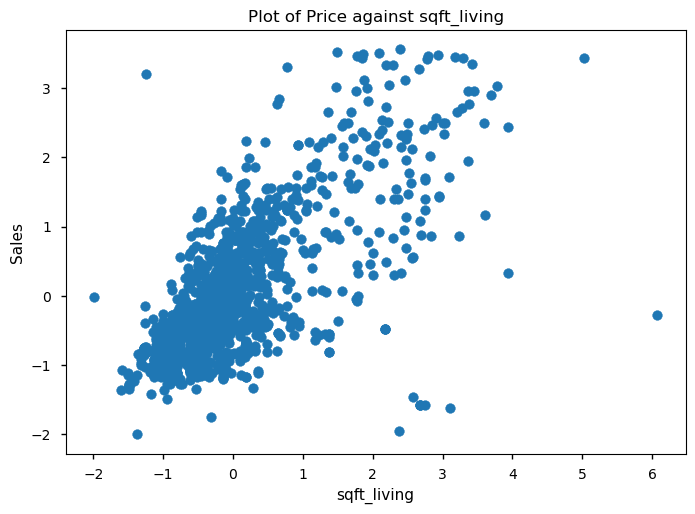

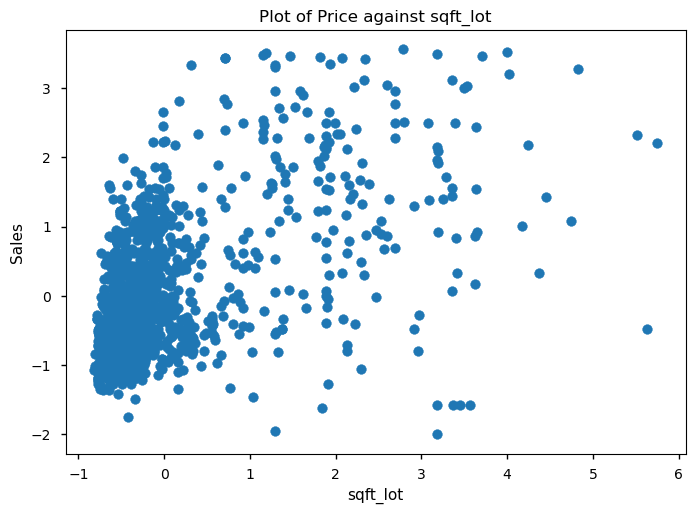

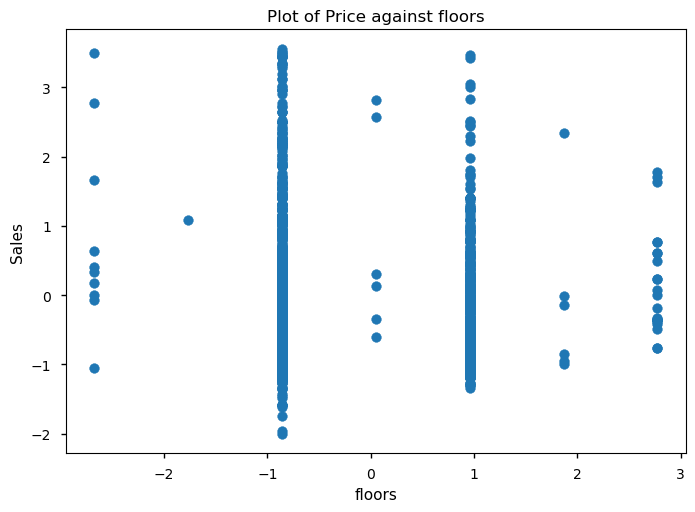

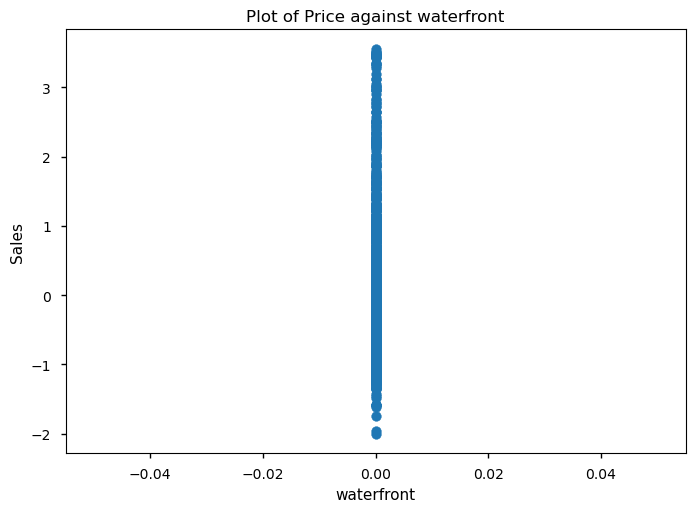

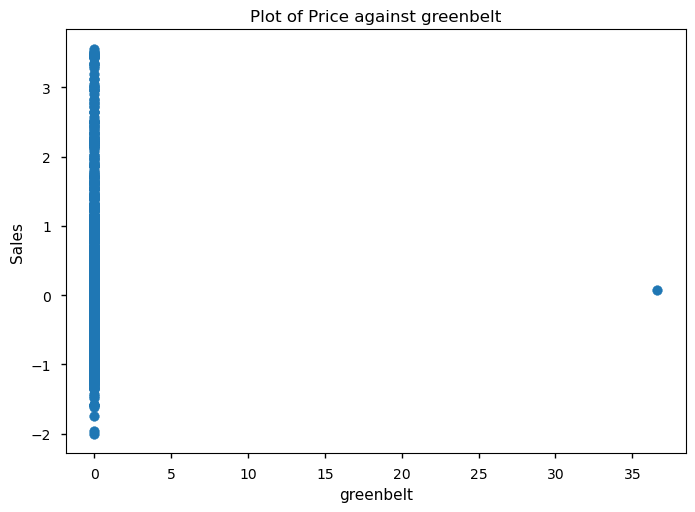

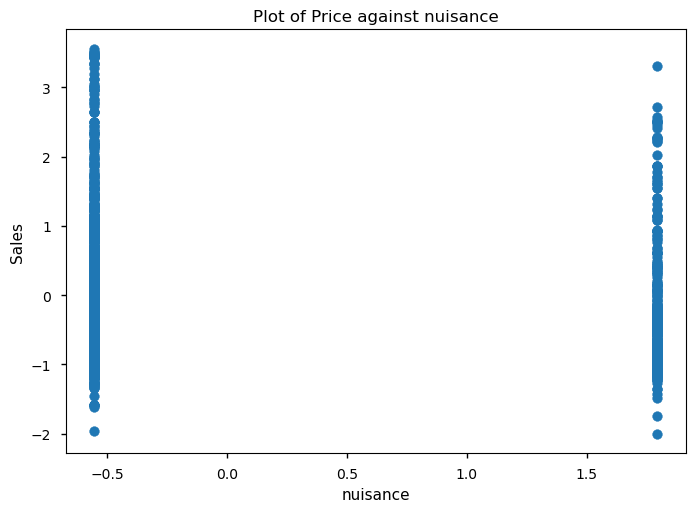

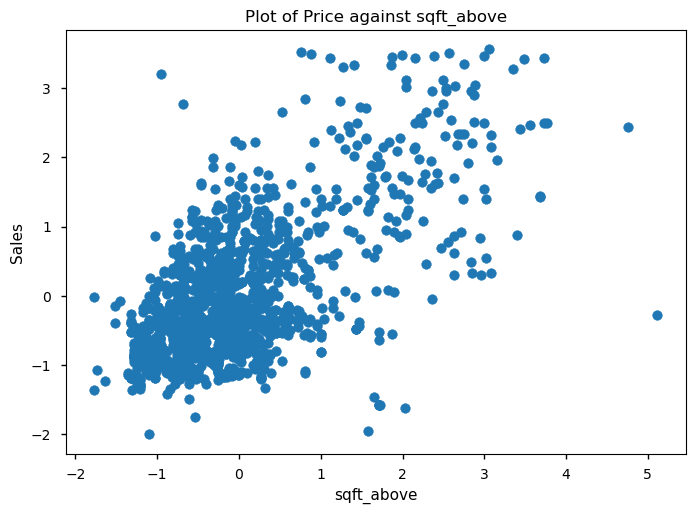

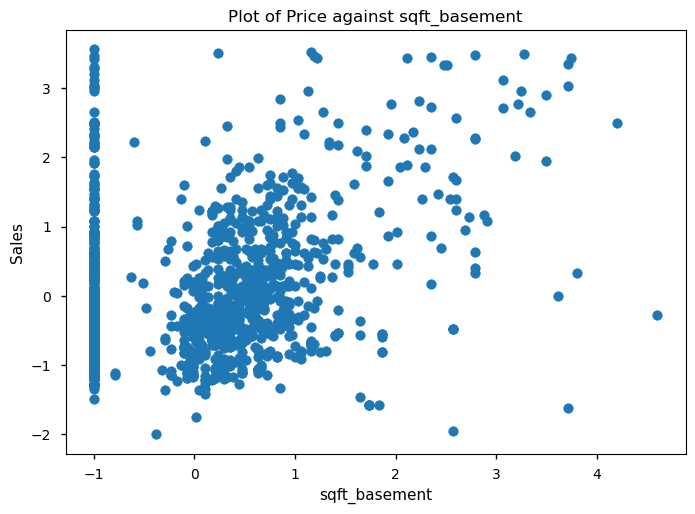

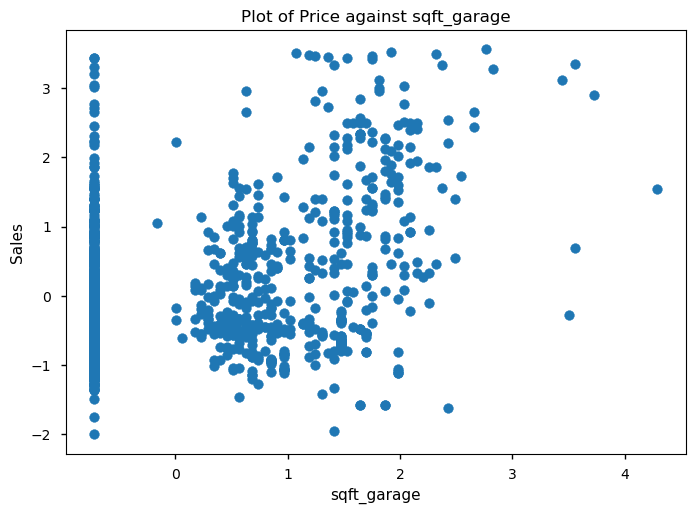

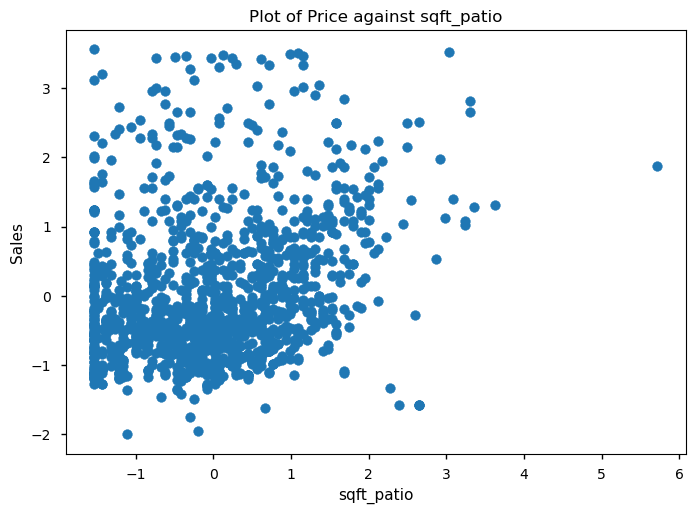

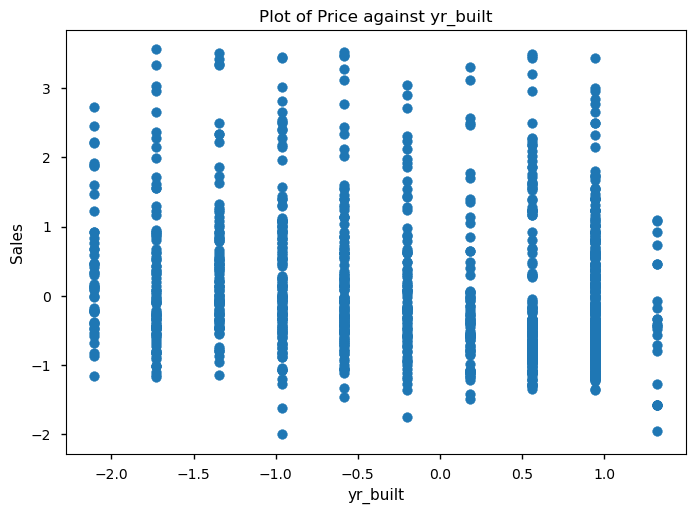

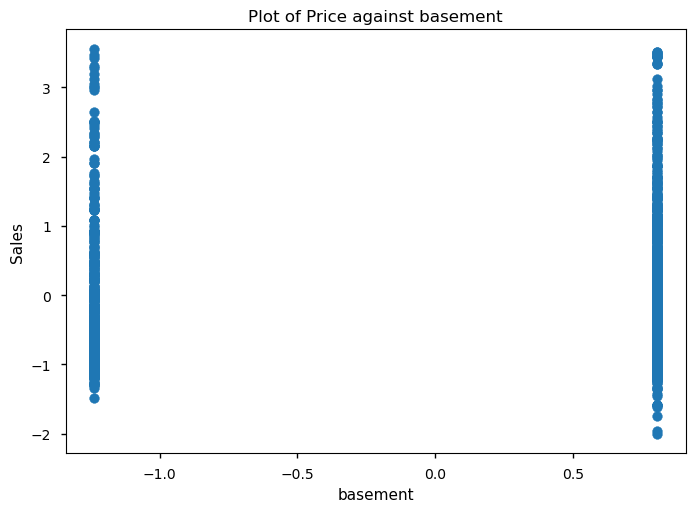

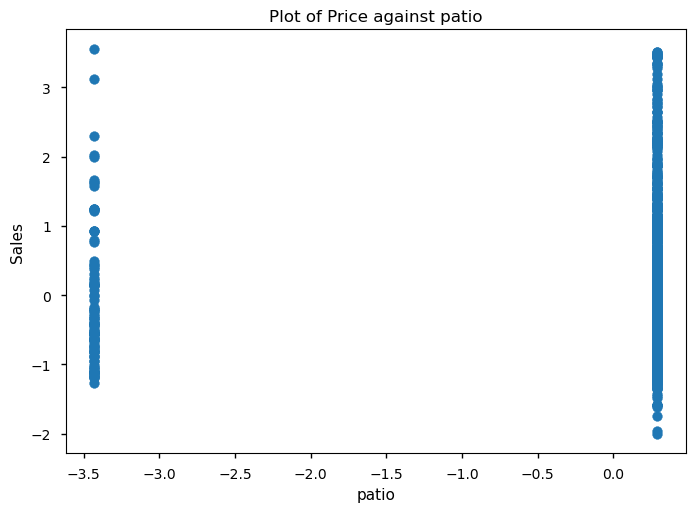

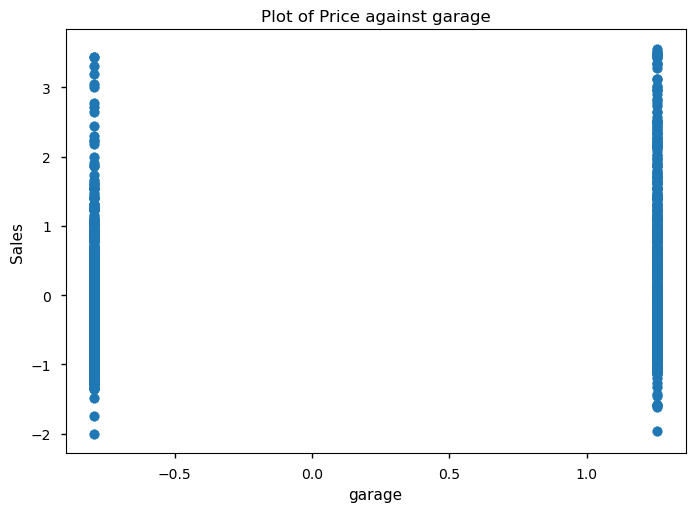

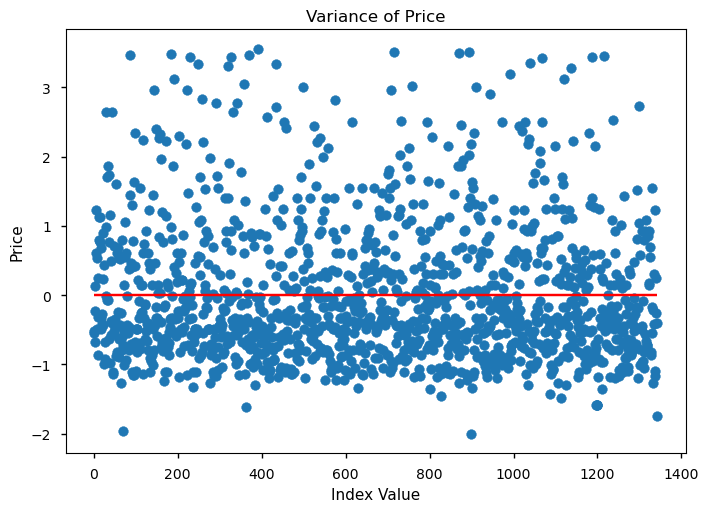

In [53]:
df_interest = scaled_df.drop(['price', 'zipcode', 'ppsq_living', 'ppsq_lot', 'avg_price'], axis=1)
features = df_interest.columns

for x in features:
    plt.scatter(df_interest[x], scaled_df['price'])
    plt.title(f'Plot of Price against {x}')
    plt.xlabel(x)
    plt.ylabel('Sales')
    plt.show()

# also plot sales against itself
plt.scatter(scaled_df.index, scaled_df['price'])
plt.hlines(scaled_df['price'].mean(), 0, len(scaled_df), colors='r')
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

### Second Multiple Linear Regression Model

In [54]:
x2 = scaled_df[['bedrooms', 'sqft_above', 'basement', 'sqft_garage', 'sqft_patio', 'nuisance', 'sqft_lot']]
y2 = scaled_df['price']

model = sm.OLS(y2, sm.add_constant(x2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          8.01e-218
Time:                        12:51:04   Log-Likelihood:                -1389.2
No. Observations:                1343   AIC:                             2794.
Df Residuals:                    1335   BIC:                             2836.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.204e-18      0.019   2.79e-16      1.000      -0.037       0.037
bedrooms        0.0016      0.026      0.061      0.951      -0.048       0.052
sqft_above      0.6956      0.038     18.273      0.000       0.621       0.770
basement        0.2980      0.025     12.158      0.000       0.250       0.346
sqft_garage    -0.1659      0.028     -5.903      0.000      -0.221      -0.111
sqft_patio      0.1617      0.019      8.351      0.000       0.124       0.200
nuisance       -0.0665      0.019     -3.552      0.000      -0.103      -0.030
sqft_lot        0.1280      0.029      4.450      0.000       0.072       0.184
==============================================================================
Omnibus:                      178.676   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.923
Skew:                          -0.302   Prob(JB):                         0.00
Kurtosis:                       8.166   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model.mse_total

1.0007451564828613

### Interpretation

All variables besides increasing numbers bedrooms are significant. The Adjusted R-squared decreased 1%. Sqaure foot of the lot, square foot above ground, and presence of a basement seem to have the biggest effect on price.

## Third Model

In [57]:
scaled = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1))
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1).columns

In [62]:
x3 = scaled_df[['sqft_above', 'basement', 'sqft_garage', 'sqft_patio', 'nuisance', 'sqft_lot']]
y3 = scaled_df['price']

model = sm.OLS(y3, sm.add_constant(x3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     257.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          4.79e-219
Time:                        12:53:31   Log-Likelihood:                -1389.2
No. Observations:                1343   AIC:                             2792.
Df Residuals:                    1336   BIC:                             2829.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.204e-18      0.019   2.79e-16      1.000      -0.037       0.037
sqft_above      0.6967      0.033     21.077      0.000       0.632       0.762
basement        0.2984      0.023     12.825      0.000       0.253       0.344
sqft_garage    -0.1662      0.028     -6.026      0.000      -0.220      -0.112
sqft_patio      0.1616      0.019      8.363      0.000       0.124       0.200
nuisance       -0.0665      0.019     -3.556      0.000      -0.103      -0.030
sqft_lot        0.1282      0.029      4.476      0.000       0.072       0.184
==============================================================================
Omnibus:                      178.467   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.977
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                       8.163   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model.mse_total

1.0007451564828613

In [ ]:
viewdummy = pd.get_dummies(df['view'], drop_first=True, prefix='view')
viewdata = pd.concat([df['price'],viewdummy], axis=1)
viewdata.corr()['price'].sort_values(ascending=False)

In [ ]:
X_ohe = sm.add_constant( viewdata.drop(['price'], axis=1))

all_mod = sm.OLS(viewdata['price'], X_ohe)

all_results = all_mod.fit()
print(all_results.summary())

In [ ]:
sns.histplot(df['bedrooms'], bins=10)

In [ ]:
pricebybedrooms=df.groupby('bedrooms').mean()['price'].sort_index()

In [ ]:
sns.barplot(x=pricebybedrooms.index, y=pricebybedrooms.values)

In [ ]:
sns.boxplot(df['bedrooms'])

In [ ]:
df['grade'].value_counts()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df).corr()['price'].sort_values(ascending=False)

In [ ]:
df.groupby('grade').mean()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df['view']).corrwith(df['price'])

In [ ]:
df[['bedrooms', 'bathrooms']]

In [ ]:
y= df['price']
x = sm.add_constant(df['bedrooms'])
sm.OLS(y,x).fit().summary()


In [ ]:
y= df['price']
x = sm.add_constant(df[['sqft_living', 'ppsq_living']])
sm.OLS(y,x).fit().summary()


In [ ]:
grade = pd.get_dummies(df['grade'],drop_first=True)
df_w_grade = pd.concat([df[['price','bedrooms', 'bathrooms', 'sqft_above', 'sqft_garage', 'sqft_basement']].reset_index(), grade.reset_index()], axis=1)

In [ ]:
df_w_grade.drop('index', axis=1, inplace=True)

In [ ]:
df_w_grade.sum()

In [ ]:
y= df_w_grade['price']
x = sm.add_constant(df_w_grade.drop(['price', 'bedrooms', 'bathrooms'], axis=1))
sm.OLS(y,x).fit().summary()

In [ ]:
y= df['price']
x = sm.add_constant(df[['ppsq_living', 'sqft_above', 'sqft_garage', 'sqft_basement']])
sm.OLS(y,x).fit().summary()

In [ ]:
df['lot_home_ratio'] = (df['sqft_living']/df['sqft_lot']).round(2)

In [ ]:
X = df[['lot_home_ratio', 'ppsq_living']]
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

In [ ]:
df['heat_source'].isin(['Electricity/Solar', 'Gas/Solar']).sum()

In [ ]:
df['heat_source'].value_counts()

In [ ]:
source = []
df.reset_index(inplace=True)
for heat in df['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df['heat_source_2'] = source_df

In [ ]:
df.drop(['index'], axis=1)

In [ ]:
df['heat_source_2'].value_counts()

In [ ]:
dummy_heat = pd.get_dummies(df['heat_source_2'])
dummy_heat.corrwith(df['price'])

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'price']].corr()

In [ ]:
##x....
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#X = dummy_heat_df[['sqft_living']]
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_patio', 'price']].corr()

In [ ]:
#column_list = list(dummy_heat_df.columns)
#column_list

In [ ]:
sns.scatterplot(x= df['sqft_garage'], y=df['price'])

In [ ]:
X = df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']].corr()

In [ ]:
sns.histplot(df['sqft_above'])

In [ ]:
X = df[['sqft_above', 'basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
sns.histplot(df['sqft_patio'])

In [ ]:
X = df[['sqft_above', 'basement', 'patio', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
X = df[['sqft_above', 'basement', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df = pd.concat([df, dummy_heat], axis=1)

In [ ]:
df.drop('heat_source_2', axis=1)